In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.int8)
print(X.shape)  # (70000, 784)
print(y.shape)  # (70000,)

(70000, 784)
(70000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [6]:
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000

Confusion Matrix:
 [[1283    1   11    0    1   13   22    4    6    2]
 [   0 1554    6    9    3    5    1    4   15    3]
 [   5   19 1233   19   13   15   21   16   27   12]
 [   7    8   38 1272    1   40    7   

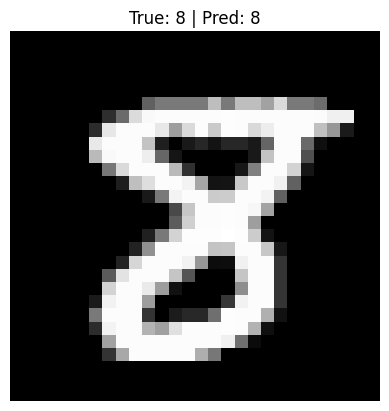

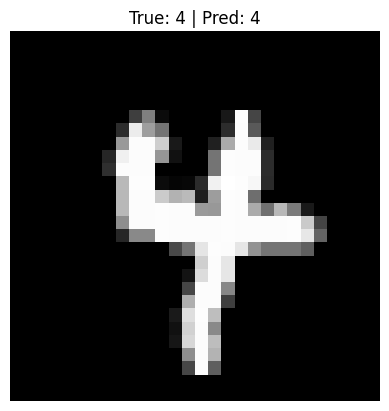

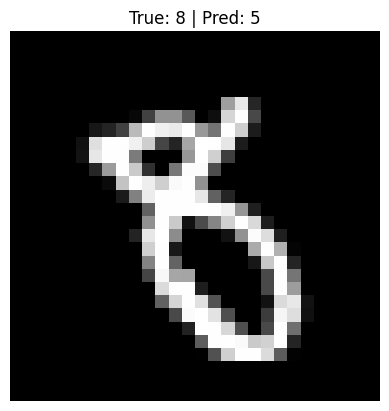

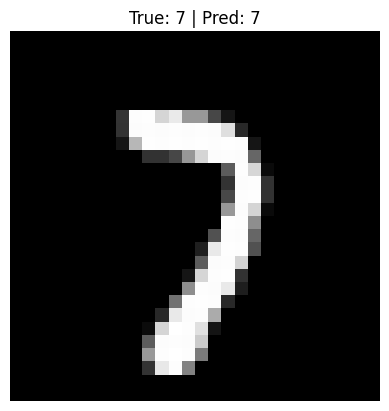

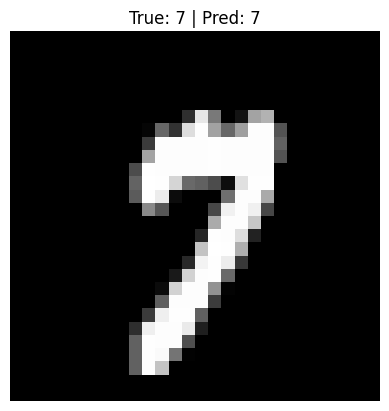

In [7]:
def plot_sample(index):
    image = X_test[index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_test[index]} | Pred: {y_pred[index]}")
    plt.axis("off")
    plt.show()

for i in range(5):
    plot_sample(i)

In [19]:
from PIL import Image
import cv2

def preprocess_image(image_path):
    """
    Load an image, convert it to 28x28 grayscale,
    flatten and scale it for prediction.
    """
    # Load image using PIL
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to MNIST size
    img_array = np.array(img)

    # Invert colors if needed (MNIST digits are white on black)
    if np.mean(img_array) > 127:
        img_array = 255 - img_array

    img_flattened = img_array.reshape(1, -1)  # Flatten to (1, 784)
    img_scaled = scaler.transform(img_flattened)  # Scale with training scaler

    return img_scaled

def predict_digit(image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)[0]
    probability = model.predict_proba(processed_image).max()
    print(f"Predicted Digit: {prediction} (Confidence: {probability:.2f})")
    return prediction

# Example usage:
predict_digit("/content/6.png")

Predicted Digit: 6 (Confidence: 0.98)


np.int8(6)